In [ ]:

!apt-get -qq update
!apt-get -qq install -y gcc
!python -m pip install --quiet pandas matplotlib


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [ ]:
%%bash
#insertion.c, mergesort.c, quicksort.c, heapsort.c

cat > insertion.c <<'EOF'
/* insertion.c */
#include <stdio.h>
#include <stdlib.h>
#include <time.h>

static void insertion_sort(int *A, int n) {
    for (int x = 1; x < n; x++) {
        int key = A[x];
        int i = x - 1;
        while (i >= 0 && A[i] > key) {
            A[i + 1] = A[i];
            i--;
        }
        A[i + 1] = key;
    }
}

int main(void) {
    int n;
    if (scanf("%d", &n) != 1)
      return 1;
    int *A = (int*) malloc((size_t)n * sizeof(int));
    if (!A)
      return 2;
    for (int i = 0; i < n; i++)
      if (scanf("%d", &A[i]) != 1){
         free(A);
         return 1;
          }
    clock_t t0 = clock();
    insertion_sort(A, n);
    clock_t t1 = clock();
    printf("%.9f\n", (double)(t1 - t0) / CLOCKS_PER_SEC);
    free(A);
    return 0;
}
EOF

cat > mergesort.c <<'EOF'
/* mergesort.c */
#include <stdio.h>
#include <stdlib.h>
#include <time.h>

static void merge(int *x, int *aux, int i, int m, int f) {
    for (int k = i; k <= f; k++)
      aux[k] = x[k];
    int ix = i, iy = m + 1, k = i;
    while (ix <= m && iy <= f) {
        if (aux[ix] <= aux[iy])
        x[k++] = aux[ix++];
        else x[k++] = aux[iy++];
    }
    while (ix <= m)
      x[k++] = aux[ix++];
    while (iy <= f)
      x[k++] = aux[iy++];
}
static void mergesort_rec(int *x, int *aux, int i, int f) {
    if (i >= f)
      return;
    int m = i + (f - i) / 2;
    mergesort_rec(x, aux, i, m);
    mergesort_rec(x, aux, m + 1, f);
    if (x[m] <= x[m+1])
      return;
    merge(x, aux, i, m, f);
}
void mergesort(int *x, int n) {
    if (n <= 1)
      return;
    int *aux = malloc(sizeof(int) * n);
    if (!aux)
      return;
    mergesort_rec(x, aux, 0, n - 1);
    free(aux);
}
int main(void) {
    int n;
    if (scanf("%d", &n) != 1)
      return 1;
    int *A = malloc(sizeof(int) * n);
    if (!A)
      return 2;
    for (int i = 0; i < n; i++)
      if (scanf("%d", &A[i]) != 1) {
        free(A);
         return 1; }
    clock_t t0 = clock();
    mergesort(A, n);
    clock_t t1 = clock();
    printf("%.9f\n", (double)(t1 - t0) / CLOCKS_PER_SEC);
    free(A);
    return 0;
}
EOF

cat > quicksort.c <<'EOF'

#include <stdio.h>
#include <stdlib.h>
#include <time.h>

#define CUTOFF 16

static void insertion_sort_range(int *A, int p, int r) {
    for (int i = p + 1; i <= r; i++) {
        int key = A[i];
        int j = i - 1;
        while (j >= p && A[j] > key) {
            A[j + 1] = A[j];
            j--;
        }
        A[j + 1] = key;
    }
}
static void swap(int *a, int *b) { int t = *a; *a = *b; *b = t; }

static int median3(int *A, int p, int r) {
    int m = (p + r) >> 1;
    if (A[m] < A[p])
      swap(&A[m], &A[p]);
    if (A[r] < A[p])
      swap(&A[r], &A[p]);
    if (A[m] < A[r])
      swap(&A[m], &A[r]);
    return A[r];
}

static int partition(int *A, int p, int r) {
    int x = median3(A, p, r);
    int i = p - 1;
    for (int j = p; j < r; j++) {
        if (A[j] <= x) {
          i++;
          swap(&A[i], &A[j]);
        }
    }
    swap(&A[i+1], &A[r]);
    return i + 1;
}

static void quicksort_rec(int *A, int p, int r) {
    while (p < r) {
        if (r - p + 1 <= CUTOFF) {
          insertion_sort_range(A, p, r);
          break;
        }
        int q = partition(A, p, r);
        if (q - p < r - q) { quicksort_rec(A, p, q - 1); p = q + 1; }
        else { quicksort_rec(A, q + 1, r); r = q - 1; }
    }
}

int main(void) {
    int n;
    if (scanf("%d", &n) != 1) return 1;
    int *A = malloc(sizeof(int) * n);
    if (!A) return 2;
    for (int i = 0; i < n; i++) if (scanf("%d", &A[i]) != 1) { free(A); return 1; }
    clock_t t0 = clock();
    quicksort_rec(A, 0, n - 1);
    clock_t t1 = clock();
    printf("%.9f\n", (double)(t1 - t0) / CLOCKS_PER_SEC);
    free(A);
    return 0;
}
EOF

cat > heapsort.c <<'EOF'
/* heapsort.c */
#include <stdio.h>
#include <stdlib.h>
#include <time.h>

static void swap(int *a, int *b) { int t = *a; *a = *b; *b = t; }

static void max_heapify(int *A, int heap_size, int i) {
    int largest = i;
    int l = 2*i + 1;
    int r = 2*i + 2;
    if (l < heap_size && A[l] > A[largest]) largest = l;
    if (r < heap_size && A[r] > A[largest]) largest = r;
    if (largest != i) {
        swap(&A[i], &A[largest]);
        max_heapify(A, heap_size, largest);
    }
}

static void build_max_heap(int *A, int n) {
    for (int i = n/2 - 1; i >= 0; i--) max_heapify(A, n, i);
}

void heapsort(int *A, int n) {
    if (n <= 1) return;
    build_max_heap(A, n);
    for (int i = n - 1; i >= 1; i--) {
        swap(&A[0], &A[i]);
        max_heapify(A, i, 0);
    }
}

int main(void) {
    int n;
    if (scanf("%d", &n) != 1) return 1;
    int *A = malloc(sizeof(int) * n);
    if (!A) return 2;
    for (int i = 0; i < n; i++) if (scanf("%d", &A[i]) != 1) { free(A); return 1; }
    clock_t t0 = clock();
    heapsort(A, n);
    clock_t t1 = clock();
    printf("%.9f\n", (double)(t1 - t0) / CLOCKS_PER_SEC);
    free(A);
    return 0;
}
EOF

echo "Arquivos C criados: insertion.c, mergesort.c, quicksort.c, heapsort.c"


Arquivos C criados: insertion.c, mergesort.c, quicksort.c, heapsort.c


In [ ]:
%%bash



gcc -O2 -std=c11 -Wall -Wextra insertion.c -o insertion
gcc -O2 -std=c11 -Wall -Wextra mergesort.c -o mergesort
gcc -O2 -std=c11 -Wall -Wextra quicksort.c -o quicksort
gcc -O2 -std=c11 -Wall -Wextra heapsort.c -o heapsort
chmod +x insertion mergesort quicksort heapsort
ls -l insertion mergesort quicksort heapsort


-rwxr-xr-x 1 root root 16304 Nov 12 18:04 heapsort
-rwxr-xr-x 1 root root 16200 Nov 12 18:04 insertion
-rwxr-xr-x 1 root root 16272 Nov 12 18:04 mergesort
-rwxr-xr-x 1 root root 16240 Nov 12 18:04 quicksort


insertion  random   n=     10 avg=0.000001s ±0.000000s
mergesort  random   n=     10 avg=0.000002s ±0.000001s
quicksort  random   n=     10 avg=0.000001s ±0.000000s
heapsort   random   n=     10 avg=0.000001s ±0.000000s
insertion  random   n=    100 avg=0.000004s ±0.000000s
mergesort  random   n=    100 avg=0.000007s ±0.000000s
quicksort  random   n=    100 avg=0.000004s ±0.000000s
heapsort   random   n=    100 avg=0.000005s ±0.000000s
insertion  random   n=   1000 avg=0.000202s ±0.000018s
mergesort  random   n=   1000 avg=0.000078s ±0.000014s
quicksort  random   n=   1000 avg=0.000049s ±0.000006s
heapsort   random   n=   1000 avg=0.000050s ±0.000000s
insertion  random   n=  10000 avg=0.018854s ±0.000552s
mergesort  random   n=  10000 avg=0.000949s ±0.000078s
quicksort  random   n=  10000 avg=0.000615s ±0.000009s
heapsort   random   n=  10000 avg=0.000669s ±0.000016s
insertion  random   n= 100000 avg=2.164054s ±0.494491s
mergesort  random   n= 100000 avg=0.011283s ±0.000043s
quicksort 

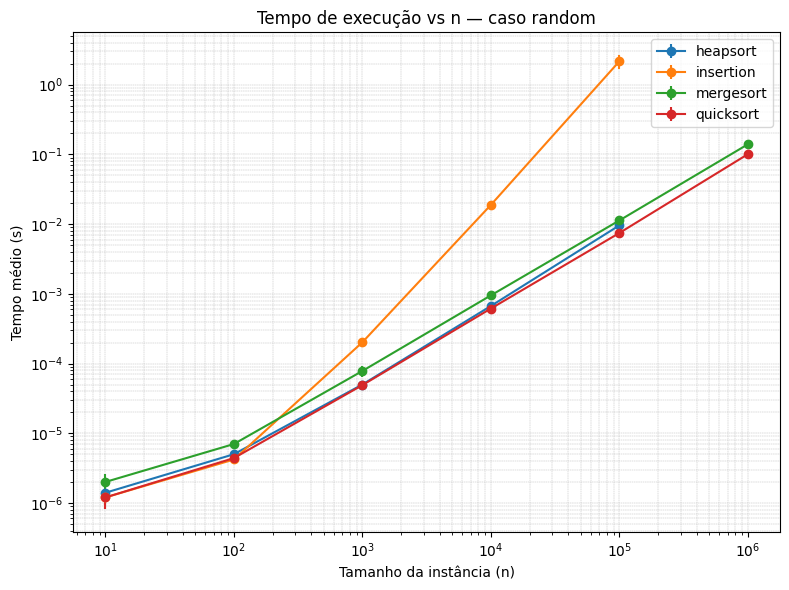

Salvo plot_sorted.png


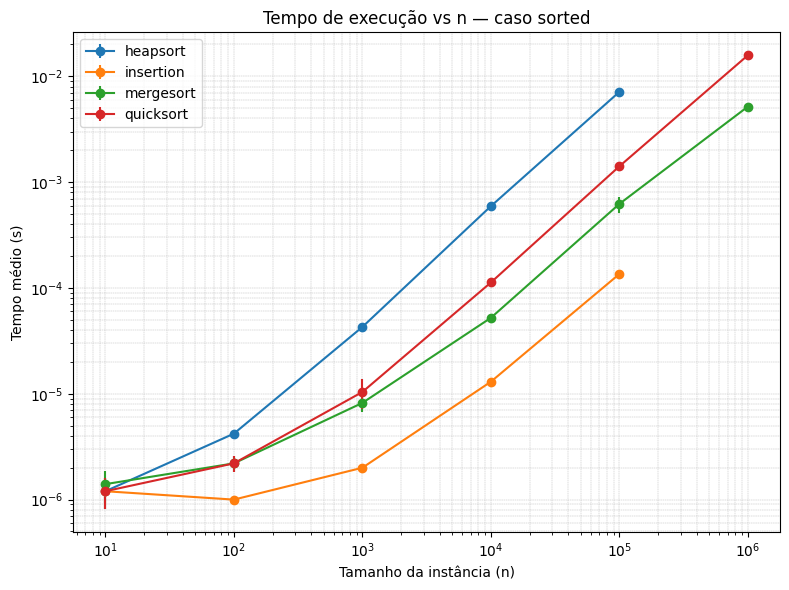

Salvo plot_reversed.png


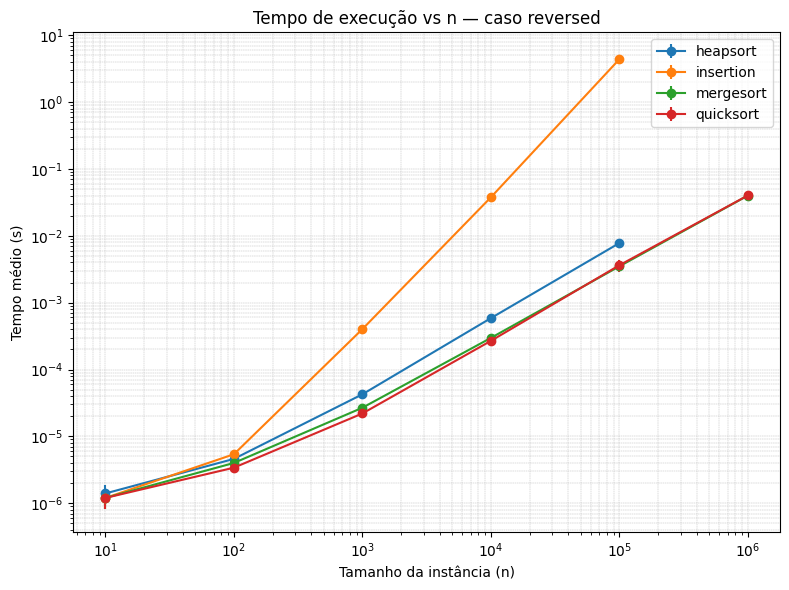

In [ ]:
# benchmark
import subprocess, random, math, statistics, os, csv, sys, time
import pandas as pd
import matplotlib.pyplot as plt

EXES = {
    "insertion": "./insertion",
    "mergesort": "./mergesort",
    "quicksort": "./quicksort",
    "heapsort": "./heapsort",
}

def run_exe(exe_path, arr, timeout=180):
    n = len(arr)
    data = (str(n) + " " + " ".join(map(str, arr)) + "\n").encode()
    try:
        out = subprocess.check_output([exe_path], input=data, timeout=timeout)
    except subprocess.CalledProcessError as e:
        raise RuntimeError(f'Process returned non-zero exit {e.returncode} for {exe_path}') from e
    return float(out.decode().strip())

def generate_case(kind, n, rng):
    if kind == "sorted":
        return list(range(n))
    elif kind == "reversed":
        return list(range(n, 0, -1))
    else:
        raise ValueError(kind)

# parâmetros
sizes = [10, 100, 1000, 10_000, 100_000, 1_000_000]
trials = 5
cases = ["sorted", "reversed"]


max_n_for_quadratic = 100_000

rows = []
raw_rows = []

for case in cases:
    for n in sizes:
        for algo in ["insertion", "mergesort", "quicksort", "heapsort"]:
            if algo in ("insertion","heapsort") and n > max_n_for_quadratic:
                print(f"pulando {algo} para n={n} (quadratic guard)")
                continue
            times = []
            for t in range(trials):
                rng = random.Random(12345 + 97*t + 7919*n)
                arr = generate_case(case, n, rng)
                try:
                    start = time.time()
                    elapsed = run_exe(EXES[algo], arr, timeout=180)
                    end = time.time()
                except Exception as e:
                    print(f"ERROR running {algo} n={n} case={case}: {e}", file=sys.stderr)
                    elapsed = None
                    # record the failure and break trials loop
                    raw_rows.append({"algo":algo,"case":case,"n":n,"trial":t,"elapsed":None,"error":str(e)})
                    break
                times.append(elapsed)
                raw_rows.append({"algo":algo,"case":case,"n":n,"trial":t,"elapsed":elapsed,"error":""})
            if len(times) == 0:
                print(f"No successful runs for {algo} n={n} case={case}; skipping stats.")
                continue
            avg = statistics.mean(times)
            s = statistics.stdev(times) if len(times) > 1 else 0.0
            ci95 = 1.96 * s / math.sqrt(len(times)) if len(times) > 1 else 0.0
            rows.append({"algo": algo, "case": case, "n": n, "trials": len(times),
                         "avg_sec": avg, "stdev_sec": statistics.pstdev(times) if len(times)>1 else 0.0,
                         "ci95_sec": ci95})
            print(f"{algo:10s} {case:8s} n={n:7d} avg={avg:.6f}s ±{ci95:.6f}s")

df = pd.DataFrame(rows)
df.to_csv("results.csv", index=False)
raw_df = pd.DataFrame(raw_rows)
raw_df.to_csv("raw_times.csv", index=False)
print("Saved results.csv and raw_times.csv")

# plota e mostra inline
for case in cases:
    d = df[df["case"] == case]
    if d.empty: continue
    plt.figure(figsize=(8,6))
    for algo in sorted(d["algo"].unique()):
        sub = d[d["algo"] == algo].sort_values("n")
        plt.errorbar(sub["n"], sub["avg_sec"], yerr=sub["ci95_sec"], marker="o", label=algo)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Tamanho da instância (n)")
    plt.ylabel("Tempo médio (s)")
    plt.title(f"Tempo de execução vs n — caso {case}")
    plt.legend()
    plt.grid(which='both', ls='--', lw=0.3)
    plt.tight_layout()
    fname = f"plot_{case}.png"
    plt.savefig(fname, dpi=150)
    print("Salvo", fname)
    plt.show()